# Question 6

**Part a**

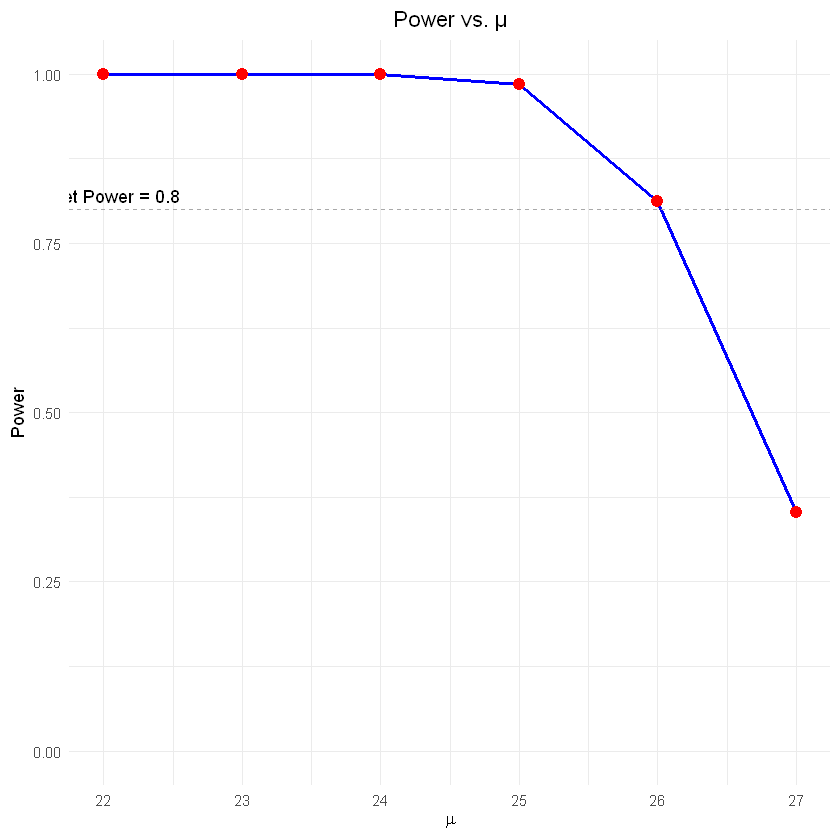

In [3]:
library(ggplot2)

# Function to calculate statistical power
calculate_statistical_power <- function(sample_mean, significance_level, actual_mean, standard_error) {
  z_alpha <- qnorm(1 - significance_level)
  z_score <- (z_alpha - ((actual_mean - sample_mean) / standard_error))
  power <- 1 - pnorm(z_score)
  return(power)
}

# Define parameters
sample_means <- c(27, 26, 25, 24, 23, 22)
significance_level <- 0.05
actual_mean <- 28
standard_error <- 0.79

# Calculate power for each sample mean
powers <- sapply(sample_means, function(mean) calculate_statistical_power(mean, significance_level, actual_mean, standard_error))

# Create a data frame
data_frame <- data.frame(sample_means, powers)

# Plot using ggplot2
ggplot(data_frame, aes(x = sample_means, y = powers)) +
  geom_line(color = "blue", size = 1) +
  geom_point(color = "red", size = 3) +
  labs(x = expression(mu), y = "Power", title = "Power vs. \u03BC") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5)) +
  geom_hline(yintercept = 0.8, linetype = "dashed", color = "darkgrey") +
  annotate("text", x = min(data_frame$sample_means), y = 0.8, label = "Target Power = 0.8", vjust = -0.5) +
  scale_y_continuous(limits = c(0, 1))


**Part b**

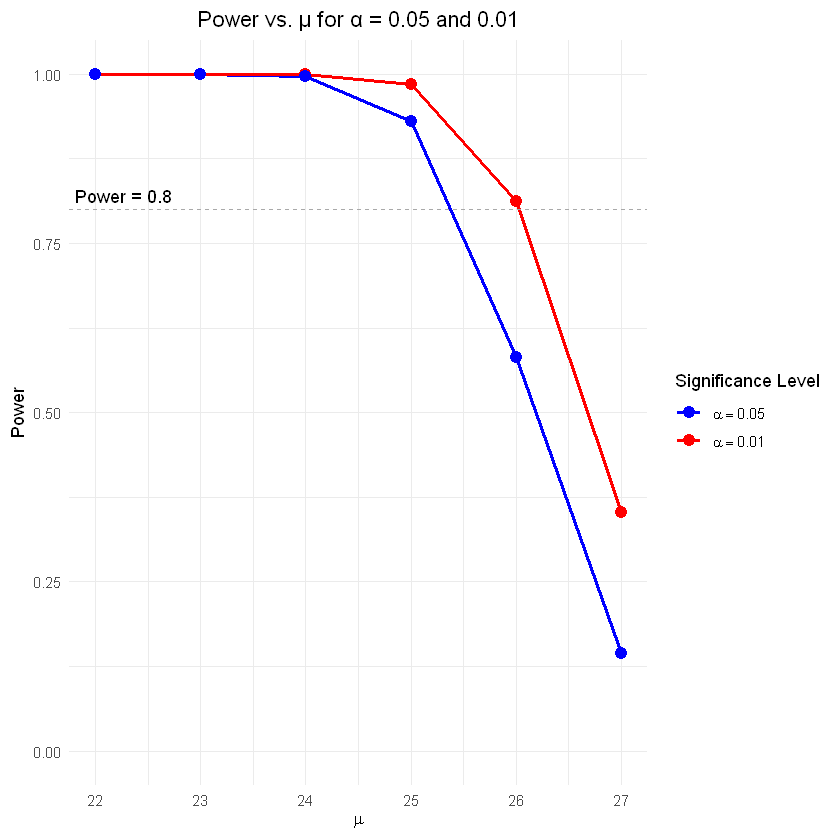

In [9]:
library(ggplot2)

# Function to calculate statistical power
calculate_statistical_power <- function(sample_mean, significance_level, actual_mean, standard_error) {
  z_alpha <- qnorm(1 - significance_level)
  z_score <- (z_alpha - ((actual_mean - sample_mean) / standard_error))
  power <- 1 - pnorm(z_score)
  return(power)
}

# Define parameters
sample_means <- c(27, 26, 25, 24, 23, 22)
significance_level_05 <- 0.05
significance_level_01 <- 0.01
actual_mean <- 28
standard_error <- 0.79

# Calculate power for each sample mean for alpha = 0.05
powers_05 <- sapply(sample_means, function(mean) calculate_statistical_power(mean, significance_level_05, actual_mean, standard_error))

# Calculate power for each sample mean for alpha = 0.01
powers_01 <- sapply(sample_means, function(mean) calculate_statistical_power(mean, significance_level_01, actual_mean, standard_error))

# Create a data frame
data_frame <- data.frame(
  sample_means = rep(sample_means, 2),
  power = c(powers_05, powers_01),
  significance_level = factor(rep(c(0.05, 0.01), each = length(sample_means)))
)

# Plot using ggplot2
ggplot(data_frame, aes(x = sample_means, y = power, color = significance_level, group = significance_level)) +
  geom_line(size = 1) +
  geom_point(size = 3) +
  labs(x = expression(mu), y = "Power", title = "Power vs. \u03BC for \u03B1 = 0.05 and 0.01") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5)) +
  scale_color_manual(values = c("blue", "red"), labels = c(expression(alpha == 0.05), expression(alpha == 0.01))) +
  guides(color = guide_legend(title = "Significance Level")) +
  geom_hline(yintercept = 0.8, linetype = "dashed", color = "darkgrey") +
  annotate("text", x = min(data_frame$sample_means), y = 0.8, label = "Target Power = 0.8", vjust = -0.5) +
  scale_y_continuous(limits = c(0, 1))


**part c**

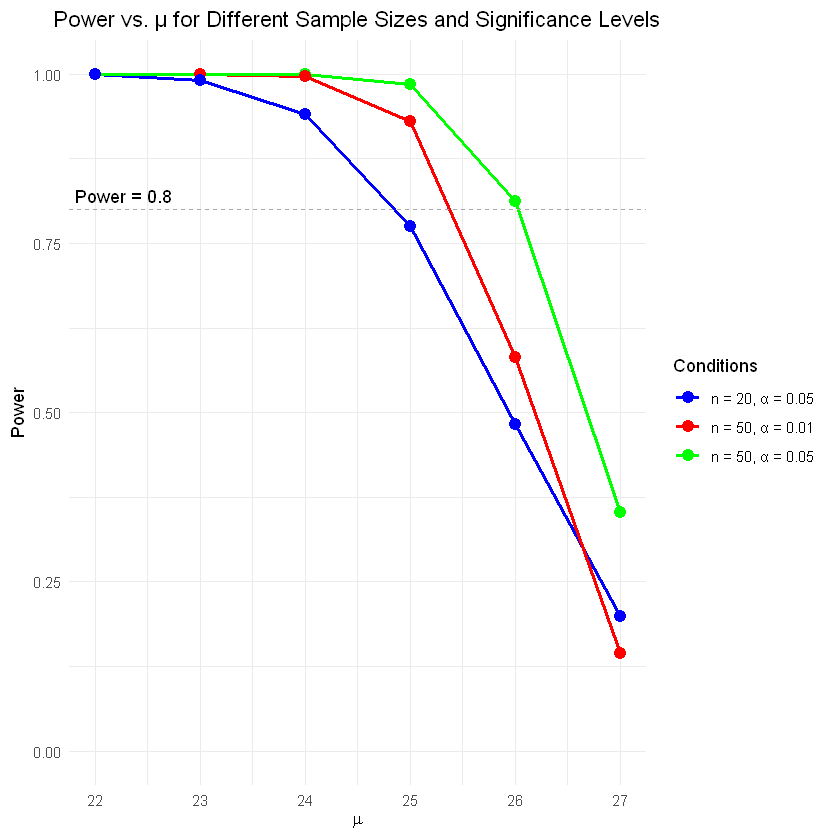

In [10]:
library(ggplot2)

# Function to calculate statistical power
calculate_statistical_power <- function(sample_mean, significance_level, actual_mean, standard_error) {
  z_alpha <- qnorm(1 - significance_level)
  z_score <- (z_alpha - ((actual_mean - sample_mean) / standard_error))
  power <- 1 - pnorm(z_score)
  return(power)
}

# Define parameters
sample_means <- c(27, 26, 25, 24, 23, 22)
actual_mean <- 28
standard_error_1 <- 0.79
standard_error_2 <- 1.25

# Calculate power for n = 50 and alpha = 0.05
significance_level_1 <- 0.05
powers_1 <- sapply(sample_means, function(mean) calculate_statistical_power(mean, significance_level_1, actual_mean, standard_error_1))

# Calculate power for n = 50 and alpha = 0.01
significance_level_2 <- 0.01
powers_2 <- sapply(sample_means, function(mean) calculate_statistical_power(mean, significance_level_2, actual_mean, standard_error_1))

# Calculate power for n = 20 and alpha = 0.05 (SE = 1.25)
significance_level_3 <- 0.05
powers_3 <- sapply(sample_means, function(mean) calculate_statistical_power(mean, significance_level_3, actual_mean, standard_error_2))

# Create a data frame
data_frame <- data.frame(
  sample_means = rep(sample_means, 3),
  power = c(powers_1, powers_2, powers_3),
  group = factor(rep(c("n = 50, α = 0.05", "n = 50, α = 0.01", "n = 20, α = 0.05"), each = length(sample_means)))
)

# Plot using ggplot2
ggplot(data_frame, aes(x = sample_means, y = power, color = group, group = group)) +
  geom_line(size = 1) +
  geom_point(size = 3) +
  labs(x = expression(mu), y = "Power", title = "Power vs. \u03BC for Different Sample Sizes and Significance Levels") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5)) +
  scale_color_manual(values = c("blue", "red", "green")) +
  guides(color = guide_legend(title = "Conditions")) +
  geom_hline(yintercept = 0.8, linetype = "dashed", color = "darkgrey") +
  annotate("text", x = min(data_frame$sample_means), y = 0.8, label = "Target Power = 0.8", vjust = -0.5) +
  scale_y_continuous(limits = c(0, 1))


<hr>

# Question 7

In [21]:
# Set the file path
file_path <- "Galton.txt"

# Read the .txt file using read.table()
galton_data <- read.table(file_path, header = TRUE)

In [22]:
head(galton_data)

,Family,Father,Mother,Gender,Height,Kids
,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<int>
1,1,78.5,67.0,M,73.2,4
2,1,78.5,67.0,F,69.2,4
3,1,78.5,67.0,F,69.0,4
4,1,78.5,67.0,F,69.0,4
5,2,75.5,66.5,M,73.5,4
6,2,75.5,66.5,M,72.5,4


**part A**

Percentage of confidence intervals that include the actual mean: 96.6 %


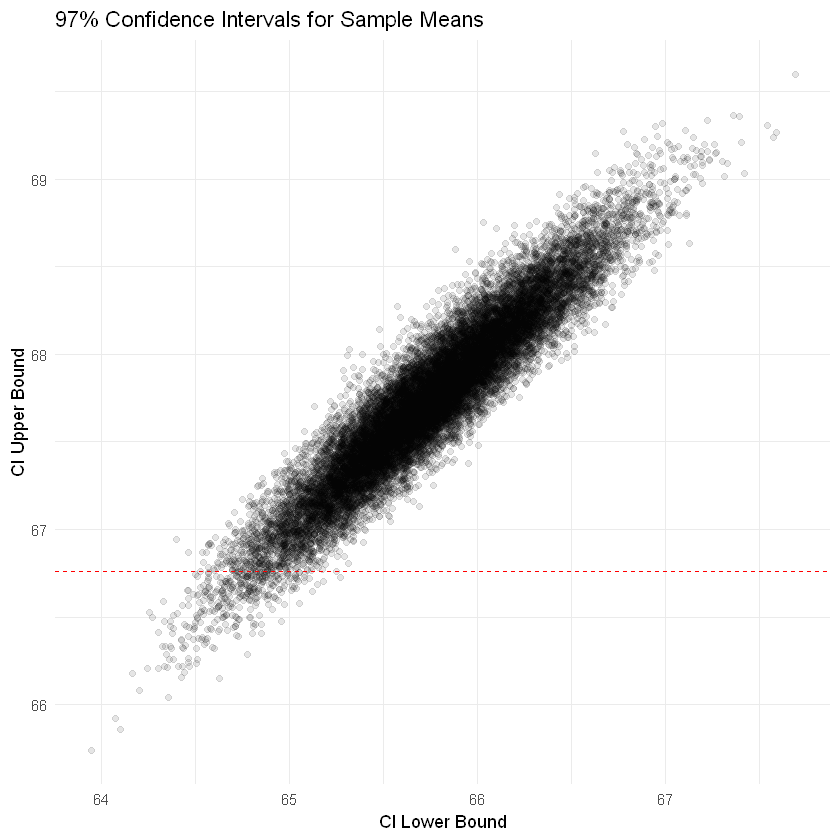

In [24]:
# Load necessary libraries
library(ggplot2)
library(dplyr)

# Calculate the actual mean height of the children
actual_mean <- mean(galton_data$Height)

# Function to calculate 97% confidence interval for a sample using z-score
calculate_ci <- function(sample) {
  sample_mean <- mean(sample)
  sample_sd <- sd(sample)
  n <- length(sample)
  alpha <- 0.03
  z_critical <- qnorm(1 - alpha / 2)
  margin_of_error <- z_critical * (sample_sd / sqrt(n))
  ci_lower <- sample_mean - margin_of_error
  ci_upper <- sample_mean + margin_of_error
  return(c(ci_lower, ci_upper))
}

# Generate 20,000 samples of size 60 and calculate the confidence intervals
set.seed(123)  # For reproducibility
n_samples <- 20000
sample_size <- 60

confidence_intervals <- replicate(n_samples, {
  sample <- sample(galton_data$Height, sample_size, replace = TRUE)
  calculate_ci(sample)
})

# Convert the matrix to a data frame for easier manipulation
ci_df <- as.data.frame(t(confidence_intervals))
colnames(ci_df) <- c("ci_lower", "ci_upper")

# Determine the proportion of intervals that include the actual mean
ci_df$includes_mean <- ci_df$ci_lower <= actual_mean & ci_df$ci_upper >= actual_mean
proportion_includes_mean <- mean(ci_df$includes_mean)

# Print the proportion
cat("Percentage of confidence intervals that include the actual mean:", proportion_includes_mean * 100, "%\n")

# Visualization (optional)
ggplot(ci_df, aes(x = ci_lower, y = ci_upper)) +
  geom_point(alpha = 0.1) +
  geom_hline(yintercept = actual_mean, color = "red", linetype = "dashed") +
  labs(title = "97% Confidence Intervals for Sample Means", x = "CI Lower Bound", y = "CI Upper Bound") +
  theme_minimal()


The graph shows 97% confidence intervals for the mean height of children, based on 20,000 samples. Each point represents a confidence interval's lower and upper bounds. The red dashed line marks the actual mean height of children. Most intervals include the actual mean, indicating the intervals are accurate.

**part B**

Percentage of 90% confidence intervals that include the actual mean: 86.59 %


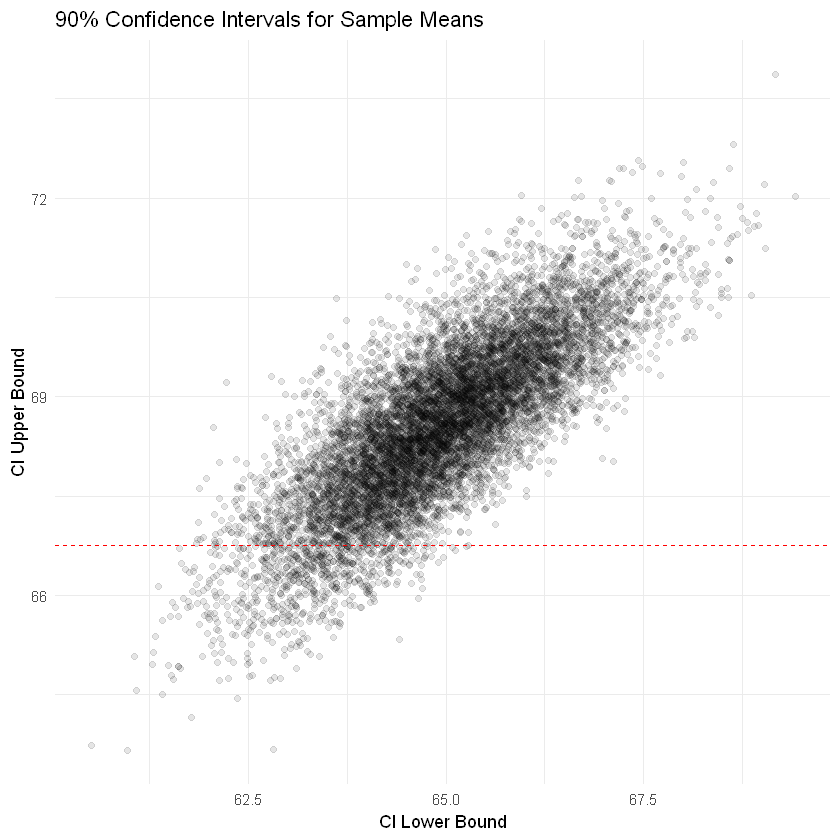

In [26]:
# Function to calculate 90% confidence interval for a sample using z-score
calculate_ci_90 <- function(sample) {
  sample_mean <- mean(sample)
  sample_sd <- sd(sample)
  n <- length(sample)
  alpha <- 0.10
  z_critical <- qnorm(1 - alpha / 2)
  margin_of_error <- z_critical * (sample_sd / sqrt(n))
  ci_lower <- sample_mean - margin_of_error
  ci_upper <- sample_mean + margin_of_error
  return(c(ci_lower, ci_upper))
}

# Generate 10,000 samples of size 10 and calculate the confidence intervals
set.seed(123)  # For reproducibility
n_samples <- 10000
sample_size <- 10

confidence_intervals_90 <- replicate(n_samples, {
  sample <- sample(galton_data$Height, sample_size, replace = TRUE)
  calculate_ci_90(sample)
})

# Convert the matrix to a data frame for easier manipulation
ci_df_90 <- as.data.frame(t(confidence_intervals_90))
colnames(ci_df_90) <- c("ci_lower", "ci_upper")

# Determine the proportion of intervals that include the actual mean
ci_df_90$includes_mean <- ci_df_90$ci_lower <= actual_mean & ci_df_90$ci_upper >= actual_mean
proportion_includes_mean_90 <- mean(ci_df_90$includes_mean)

# Print the proportion
cat("Percentage of 90% confidence intervals that include the actual mean:", proportion_includes_mean_90 * 100, "%\n")

# Visualization (optional)
ggplot(ci_df_90, aes(x = ci_lower, y = ci_upper)) +
  geom_point(alpha = 0.1) +
  geom_hline(yintercept = actual_mean, color = "red", linetype = "dashed") +
  labs(title = "90% Confidence Intervals for Sample Means", x = "CI Lower Bound", y = "CI Upper Bound") +
  theme_minimal()


1. **First Test (97% Confidence Intervals, Sample Size 60):**
   - **Visualization**: The first plot shows 97% confidence intervals for 20,000 samples, each of size 60. The red dashed line indicates the actual mean of the children's heights.
   - **Percentage of Intervals Including the Actual Mean**: A high percentage of the intervals include the actual mean, as expected from a 97% confidence level.
   - **Observation**: The intervals are quite tight, showing that with a larger sample size (n=60), the confidence intervals are more precise.

2. **Second Test (90% Confidence Intervals, Sample Size 10):**
   - **Visualization**: The second plot shows 90% confidence intervals for 10,000 samples, each of size 10. The red dashed line again indicates the actual mean of the children's heights.
   - **Percentage of Intervals Including the Actual Mean**: A lower percentage of intervals include the actual mean compared to the first test, but still close to the expected 90%.
   - **Observation**: The intervals are wider and more dispersed compared to the first test, indicating that smaller sample sizes (n=10) lead to less precise confidence intervals.

**part C**

Z-score: 14.70333 
P-value: 0 
Power of the test: 1 


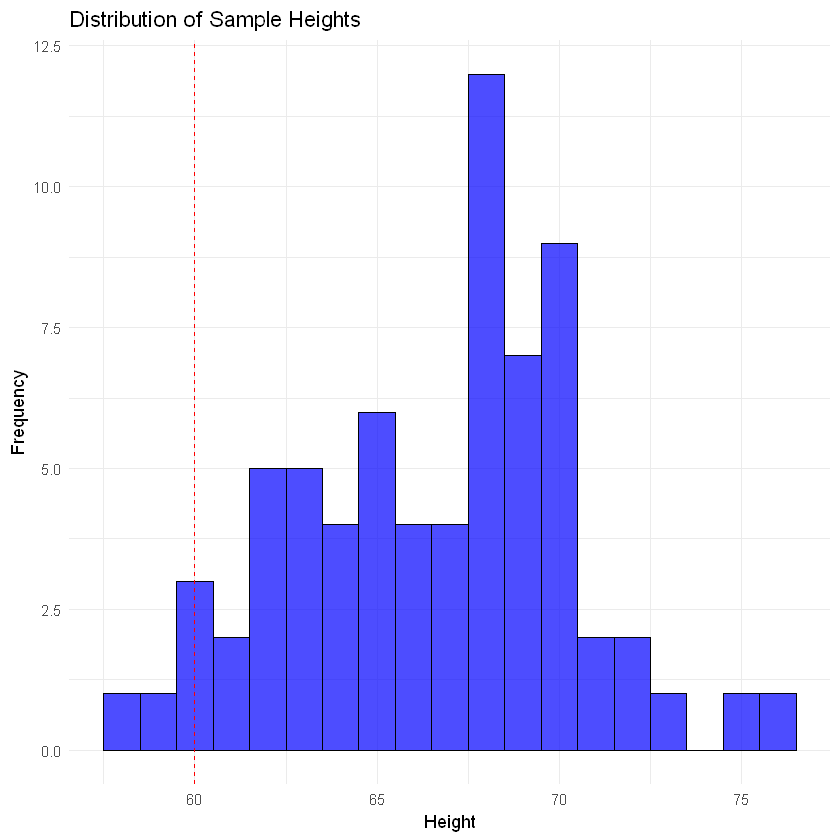

In [33]:
set.seed(123)  # For reproducibility

#Draw a random sample of size 70
sample_size <- 70
sample_data <- sample_n(galton_data, sample_size)

# Calculate sample statistics
sample_mean <- mean(sample_data$Height)
sample_sd <- sd(sample_data$Height)
n <- sample_size
population_mean <- 60

# Calculate z-score
z_score <- (sample_mean - population_mean) / (sample_sd / sqrt(n))
p_value <- 2 * (1 - pnorm(abs(z_score)))  # Two-tailed test

# Print the z-test results
cat("Z-score:", z_score, "\n")
cat("P-value:", p_value, "\n")

# Calculate the power of the z-test
# For the power calculation, we assume an effect size (difference from the null hypothesis mean)
alpha <- 0.05  # Significance level
z_alpha <- qnorm(1 - alpha / 2)
effect_size <- (sample_mean - population_mean) / (sample_sd / sqrt(n))

# Calculate the power
power <- 1 - pnorm(z_alpha - effect_size) + pnorm(-z_alpha - effect_size)

# Print the power of the test
cat("Power of the test:", power, "\n")

# Optional: Visualize the sample distribution
ggplot(sample_data, aes(x = Height)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black", alpha = 0.7) +
  geom_vline(xintercept = 60, color = "red", linetype = "dashed") +
  labs(title = "Distribution of Sample Heights", x = "Height", y = "Frequency") +
  theme_minimal()

- **Hypothesis Test Outcome**: The test strongly rejects the null hypothesis that the mean height of the children is 60. The evidence from the sample shows that the mean height is significantly different from 60.

- **Power Analysis**: The test is extremely powerful (power = 1), meaning it is highly capable of detecting a true effect if one exists. This high power is due to the large deviation of the sample mean from the hypothesized mean and the relatively large sample size.

**part D**

Z-score: 7.806538 
P-value: 5.77316e-15 
Power of the test: 1 


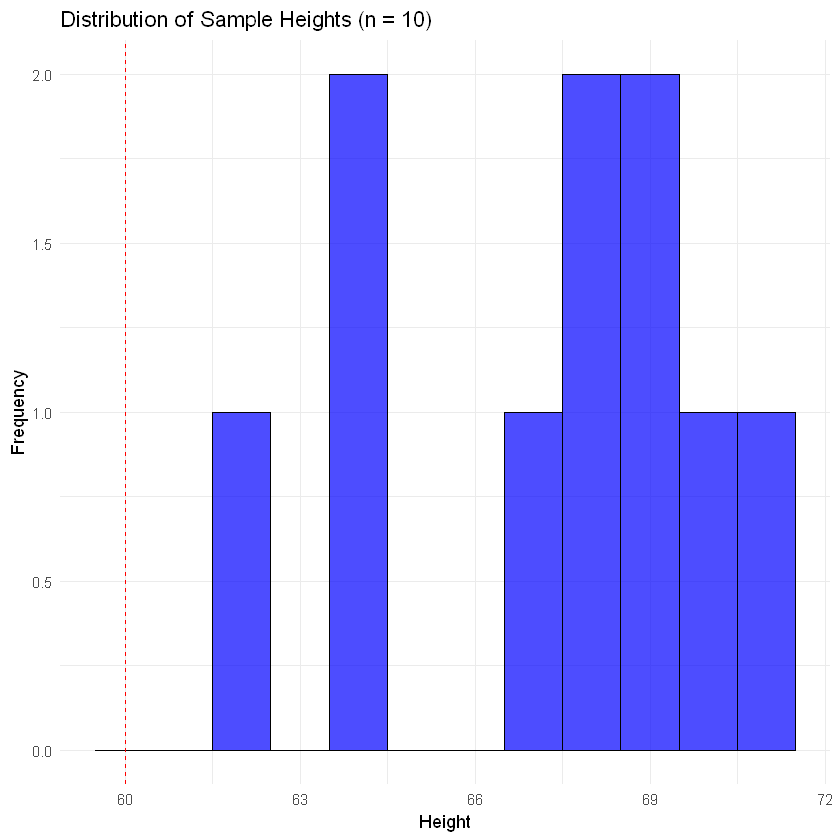

In [37]:
set.seed(123)  # For reproducibility

# Step 1: Draw a random sample of size 10
sample_size <- 10
sample_data <- sample_n(galton_data, sample_size)

# Calculate sample statistics
sample_mean <- mean(sample_data$Height)
sample_sd <- sd(sample_data$Height)
n <- sample_size
population_mean <- 60

# Calculate z-score
z_score <- (sample_mean - population_mean) / (sample_sd / sqrt(n))
p_value <- 2 * (1 - pnorm(abs(z_score)))  # Two-tailed test

# Print the z-test results
cat("Z-score:", z_score, "\n")
cat("P-value:", p_value, "\n")

# Step 3: Calculate the power of the z-test
# For the power calculation, we assume an effect size (difference from the null hypothesis mean)
alpha <- 0.05  # Significance level
z_alpha <- qnorm(1 - alpha / 2)
effect_size <- (sample_mean - population_mean) / (sample_sd / sqrt(n))

# Calculate the power
power <- 1 - pnorm(z_alpha - effect_size) + pnorm(-z_alpha - effect_size)

# Print the power of the test
cat("Power of the test:", power, "\n")

# Optional: Visualize the sample distribution
ggplot(sample_data, aes(x = Height)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black", alpha = 0.7) +
  geom_vline(xintercept = 60, color = "red", linetype = "dashed") +
  labs(title = "Distribution of Sample Heights (n = 10)", x = "Height", y = "Frequency") +
  theme_minimal()

- **Hypothesis Test Outcome**: The test strongly rejects the null hypothesis that the mean height of the children is 60. The evidence from the sample shows that the mean height is significantly different from 60.

- **Power Analysis**: The test is extremely powerful (power = 1), indicating it is highly capable of detecting a true effect if one exists, despite the smaller sample size. This high power is likely due to the large deviation of the sample mean from the hypothesized mean.

**part E**


- Both tests provide strong evidence against the null hypothesis $H_0: \mu = 60$, indicating that the true mean height of the children is significantly different from 60.

- The larger sample size (70) provides more precision, while the smaller sample size (10) still shows significant results due to the large effect size.

- The high power in both tests confirms the reliability of the results, making it very unlikely that these findings are due to random chance.